In [2]:
import sys
import importlib.util

src_dir = "/home/ubuntu/SML/SIGMAxPortal301-Team2/src"

sys.path.append(src_dir)

src_path = "/home/ubuntu/SML/SIGMAxPortal301-Team2/src/wrapper.py"
spec = importlib.util.spec_from_file_location("sigmaportal", src_path)
sigmaportal = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sigmaportal)

In [3]:
from problem2 import *

In [4]:
video_path = '/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/video/IMG_9860.mp4'
video = sigmaportal.read_video_to_tensor(video_path, frame_step=5, max_frame=1500)

In [5]:
print(f"Video shape: {video.shape}")

Video shape: torch.Size([173, 3, 1080, 1920])


3158 red Pixels,  433 Segments.


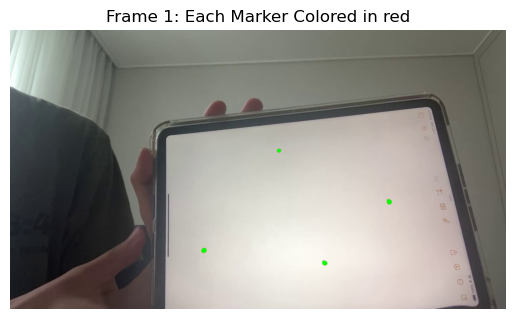

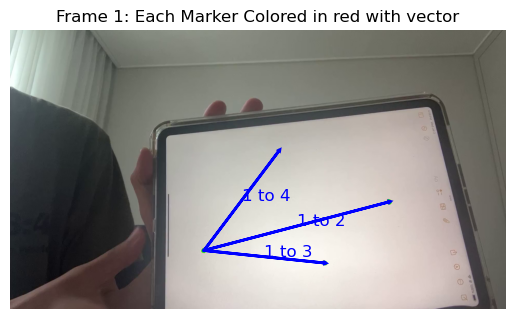

In [6]:
highlighted_pictures = []
marker_list = []

markers, highlighted_frame = heuristic_marker_highlight_for_first_frame(video[0], 
                                                                        black_threshold=0.5, 
                                                                        red_threshold=0.5, 
                                                                        gb_threshold=0.5,
                                                                        ratio_threshold=1.5,
                                                                        marker_size_threshold=40,
                                                                        number_of_markers=4, 
                                                                        picture=True)
highlighted_pictures.append(highlighted_frame)
marker_list.append(markers)
sigmaportal.show_picture(highlighted_frame, title='Frame 1: Each Marker Colored in red')
show_picture_with_marker_vector(highlighted_frame, markers, title='Frame 1: Each Marker Colored in red with vector')

In [7]:
for i in range(video.shape[0]-1):
    markers, highlighted_frame = marker_highlight(video[i], previous_marker=marker_list[-1], 
                                                  black_threshold=0.5, red_threshold=0.5, gb_threshold=0.5,
                                                  pixel_per_marker=20, picture=True)
    highlighted_pictures.append(highlighted_frame)
    marker_list.append(markers)

/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/SML/problem2.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  marker[key] = torch.mean(torch.tensor(segments[key]).to(dtype=torch.float32), dim=0)


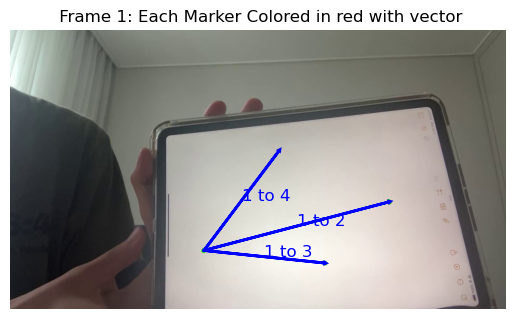

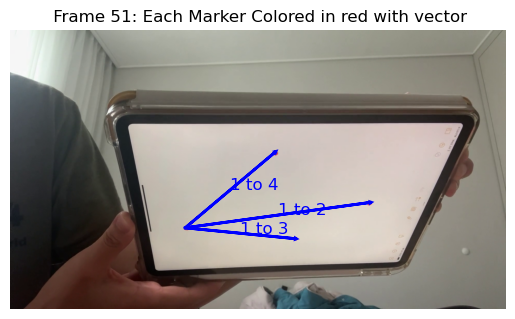

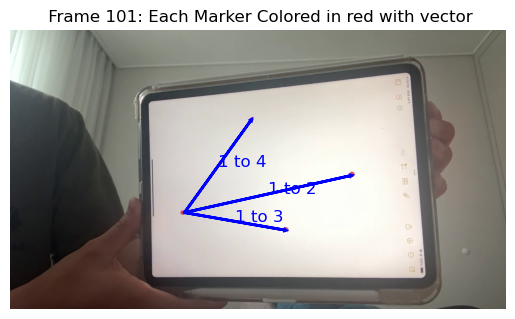

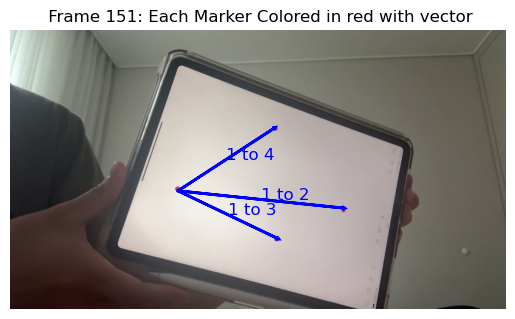

In [8]:
for i in range(0, len(highlighted_pictures), 50):
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')

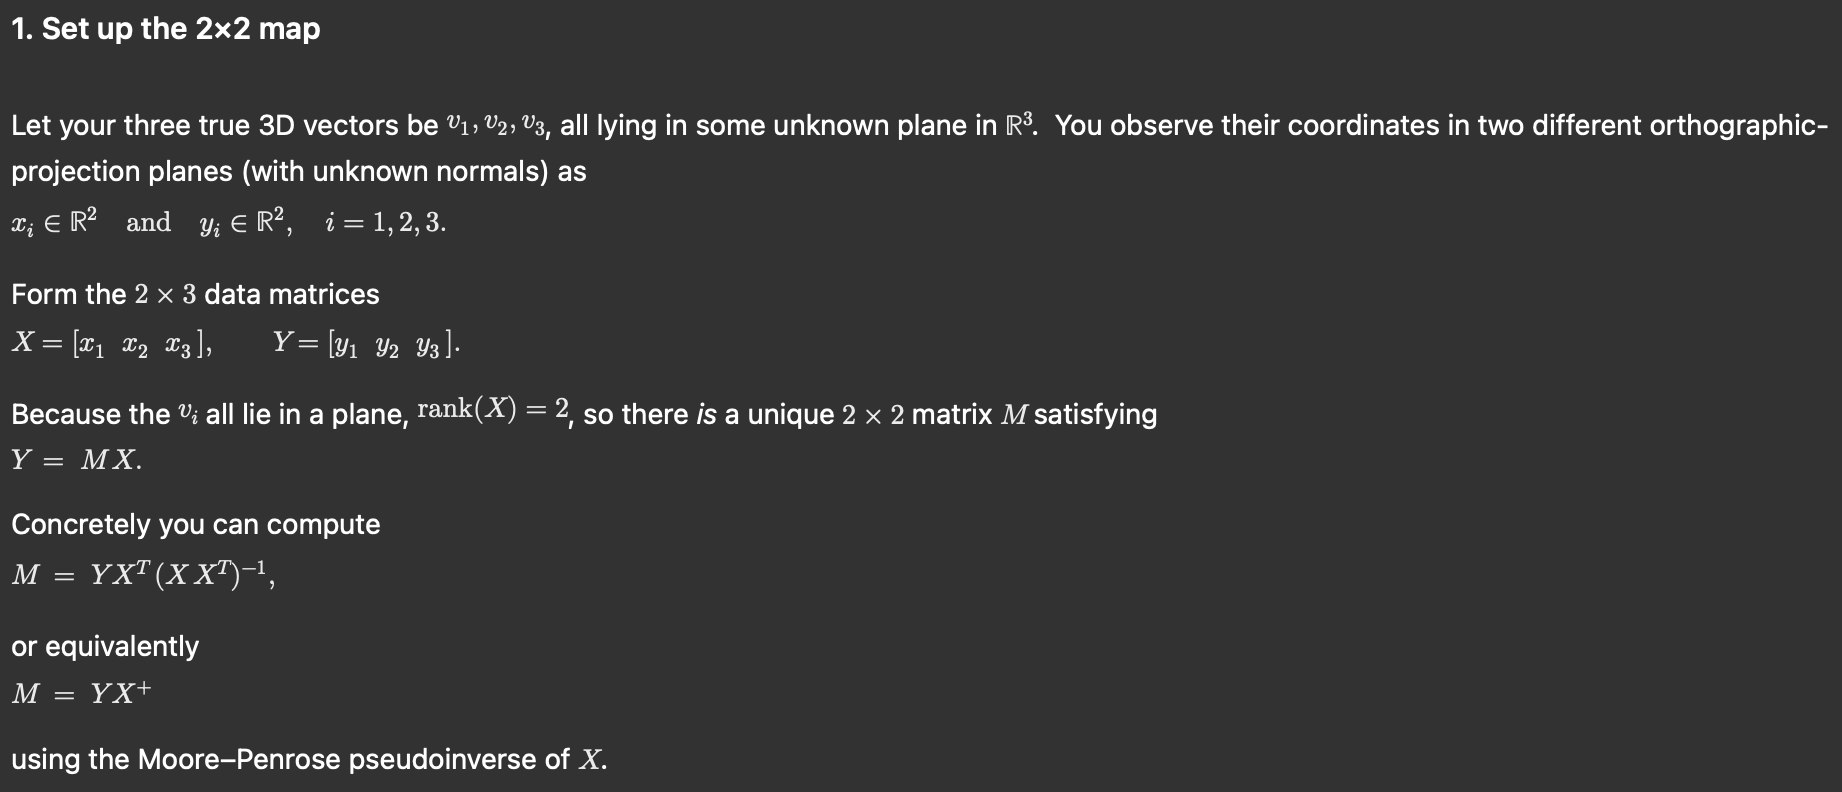
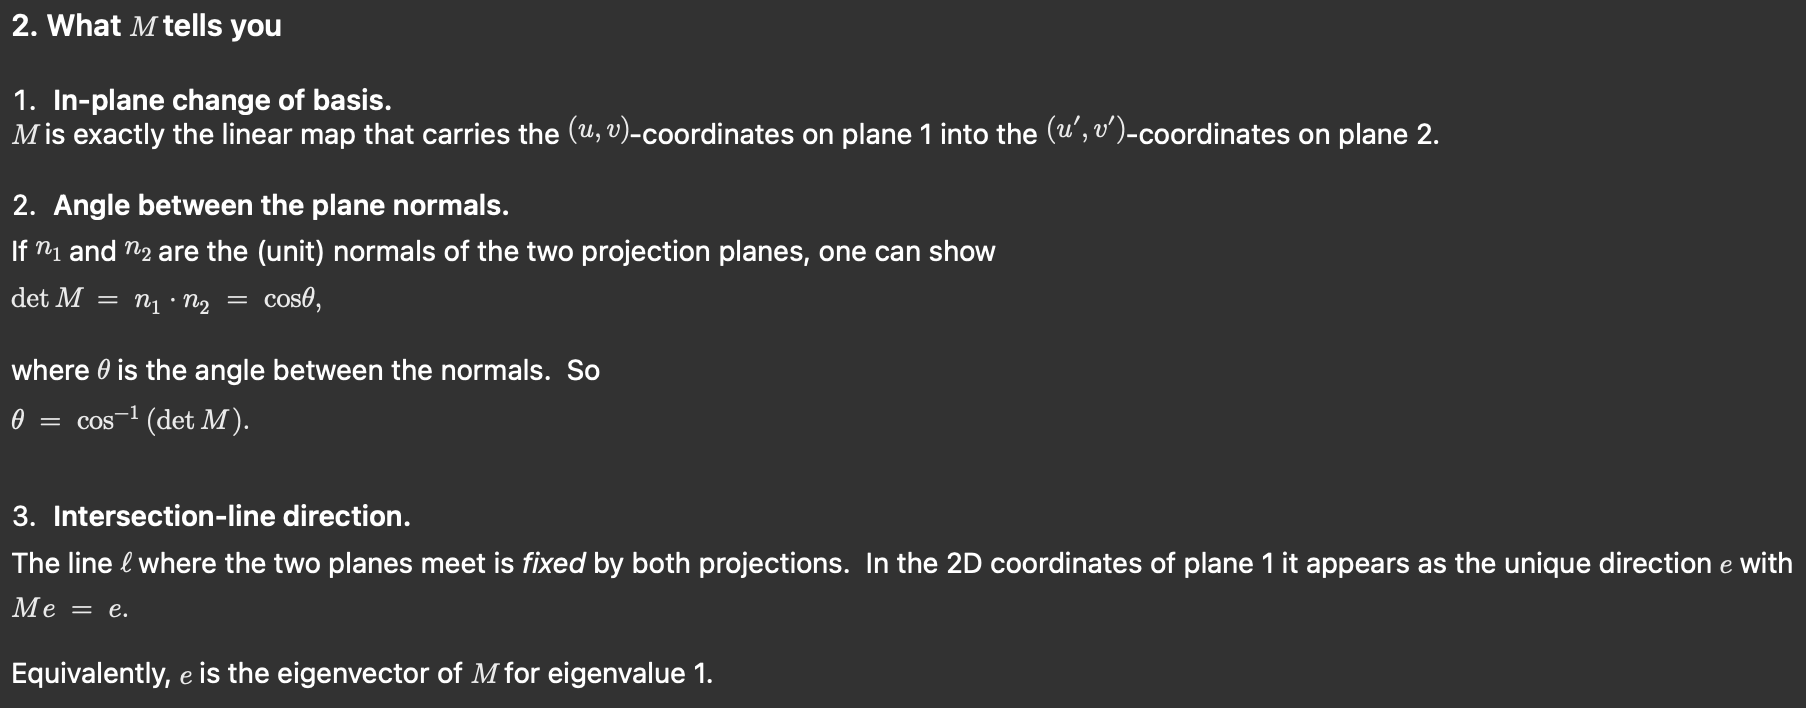
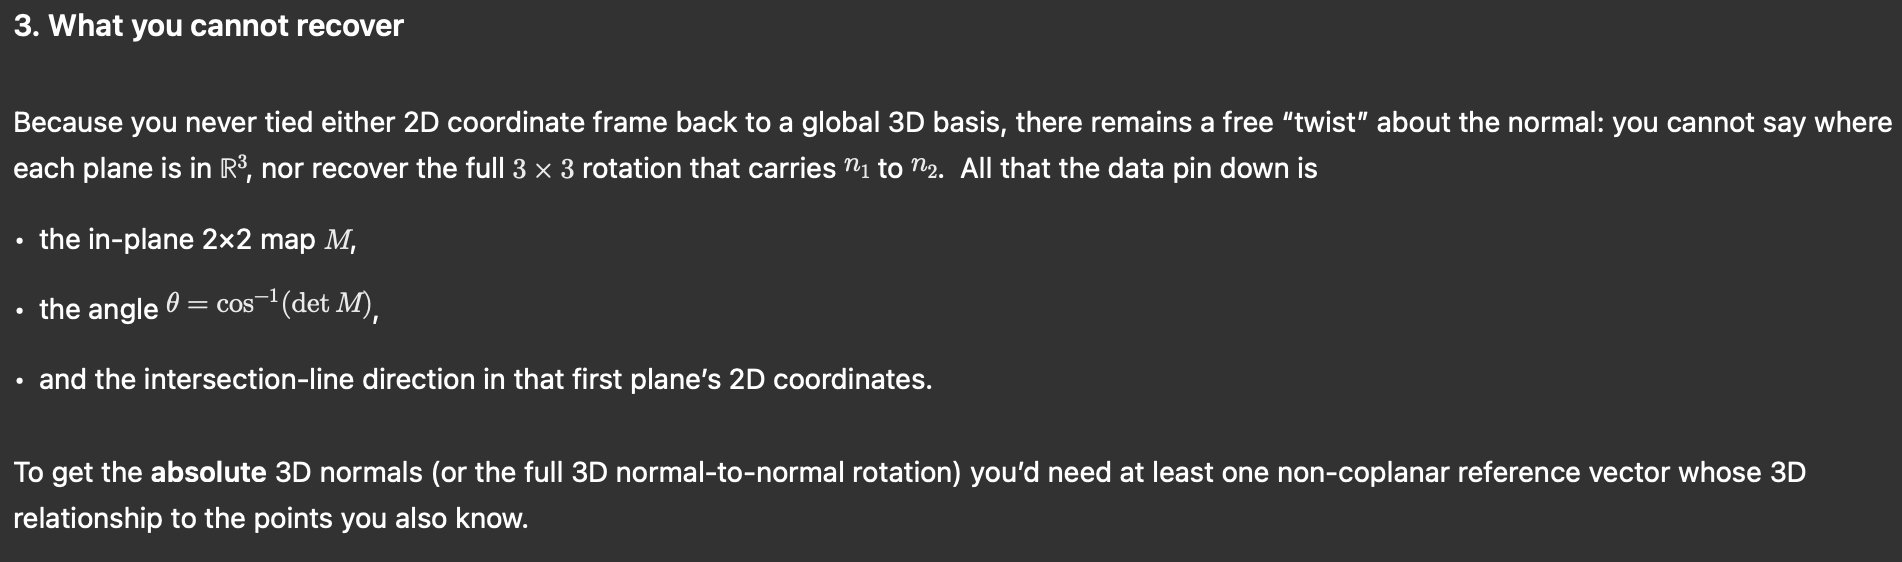

In [9]:
vector_list = []
for marker in marker_list:
    origin = marker["Marker 1"]
    temp_vector_list = []
    for i in range(2, len(list(marker.keys()))+1):
        target = marker[f'Marker {i}']
        vector = target - origin
        temp_vector_list.append(vector)
    vector_list.append(torch.stack(temp_vector_list).t())

In [10]:
M_list = []
angle_list = []
e_list = []
for i in range(1, len(vector_list)):
    M, angle, e = compute_projection_relation_assuming_perfect_2d_camera(vector_list[0], vector_list[i])
    M_list.append(M)
    angle_list.append(angle)
    e_list.append(e)

In [11]:
for i in [50, 100, 150]:
    print(M_list[i], torch.det(M_list[i]))
    print(angle_list[i])
    print(e_list[i])
    print()

tensor([[ 0.7694,  0.0449],
        [-0.1981,  0.9406]]) tensor(0.7326)
tensor(0.7487)
tensor([0.3968, 0.9179])

tensor([[ 0.9631,  0.0476],
        [-0.0428,  0.8878]]) tensor(0.8570)
tensor(0.5414)
tensor([ 0.7846, -0.6200])

tensor([[ 0.8429,  0.3527],
        [-0.3556,  0.8134]]) tensor(0.8110)
tensor(0.6249)
tensor([-0.0415,  0.9991])

